In [32]:
import pandas as pd
# import sweetviz as sv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# 1. Description
The data we have is from two sources (see first two scripts):
* WESAD
* Nurse Study

We combine these two datasets into one. The contain the same information (x, y, z values from the same wrist sensor) and the same labels (stress/no stress). The accelerometer data is recorded with 32 Hz. In the following, we look at the raw dataset, as well as the features created with the FLIRT (https://flirt.readthedocs.io/en/latest/) library (see other script).

Note: there might be other potential features to be calculated on the raw data, for example via tsfresh (https://tsfresh.readthedocs.io/en/latest/index.html) or TSFEL (https://tsfel.readthedocs.io/en/latest/). However, FLIRT was specifically developed with the wrist sensor used in the two dataset used here, so we can reasonably expect it to produce meaningful features based on the accelerometer data.

# 2. Data Source

## 2.1 Raw data source

In [34]:
# load data
df_wesad = pd.read_parquet('data-input/dataset_wesad.parquet')
df_nurses = pd.read_parquet('data-input/dataset_nurses.parquet')

In [35]:
df_raw = pd.concat([df_wesad, df_nurses])

In [36]:
df_raw

,x,y,z,subject,label
0,23.0,-1.0,59.0,S10,0
1,24.0,0.0,59.0,S10,0
2,25.0,0.0,58.0,S10,0
3,23.0,-1.0,57.0,S10,0
4,24.0,0.0,59.0,S10,0
...,...,...,...,...,...
8543804,-28.0,-58.0,10.0,F5,1
8543805,-15.0,-60.0,21.0,F5,1
8543806,-10.0,-42.0,33.0,F5,1
8543807,-13.0,-31.0,35.0,F5,1


In [37]:
# there are no missing values in the dataset
df_raw.isnull().sum()

x          0
y          0
z          0
subject    0
label      0
dtype: int64

In [38]:
df_raw['subject'].value_counts()

83     1372819
E4     1127162
DF      835993
7A      821472
CE      613793
BG      608655
EG      549124
6B      516369
6D      482968
5C      460948
F5      385411
94      267022
7E      221270
8B      187973
15       92830
S10      60963
S17      60929
S15      59554
S11      59519
S14      59361
S16      59295
S13      59008
S5       58975
S8       58847
S6       58561
S7       58431
S9       58399
S4       57379
S3       56961
S2       56288
Name: subject, dtype: int64

In [39]:
df_raw['label'].value_counts(normalize=True)

1    0.79448
0    0.20552
Name: label, dtype: float64

## 2.2 Features dataset

In [40]:
# load data - features calculated with Flirt with
# window_length = 60 and
# window_step_size = 1
df = pd.read_parquet('data-input/flirt-60-1.parquet')

In [41]:
df

,x_mean,x_std,x_min,x_max,x_ptp,x_sum,x_energy,x_skewness,x_kurtosis,x_peaks,...,l2_n_sign_changes,l2_iqr,l2_iqr_5_95,l2_pct_5,l2_pct_95,l2_entropy,l2_perm_entropy,l2_svd_entropy,subject,label
0,-39.333854,21.911315,-119.0,41.0,160.0,-75521.0,3892335.0,0.667670,1.122428,480,...,0,6.716873,38.096548,49.909418,88.005966,7.546237,0.999670,0.456264,15,0
1,-39.522917,21.929207,-119.0,41.0,160.0,-75884.0,3922466.0,0.690015,1.133307,485,...,0,6.711957,38.096548,49.909418,88.005966,7.546232,0.999489,0.456358,15,0
2,-39.884375,21.849108,-119.0,41.0,160.0,-76578.0,3970842.0,0.734060,1.226828,490,...,0,6.757474,37.567903,50.438062,88.005966,7.546386,0.999269,0.455761,15,0
3,-40.117188,21.847705,-119.0,41.0,160.0,-77025.0,4006485.0,0.754623,1.275292,490,...,0,6.441981,36.429907,50.546513,86.976421,7.546820,0.999406,0.455364,15,0
4,-40.265625,21.854092,-119.0,41.0,160.0,-77310.0,4029930.0,0.772855,1.290254,494,...,0,6.300316,35.156783,50.943094,86.099877,7.547107,0.999406,0.452354,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,59.100629,0.877353,56.0,64.0,8.0,9397.0,555491.0,1.088573,8.819387,17,...,0,0.261592,1.994493,61.926548,63.921042,5.068814,0.904938,0.083176,S9,1
641,59.125984,0.980054,56.0,64.0,8.0,7509.0,444099.0,0.900382,6.406320,17,...,0,0.535871,2.331194,61.762448,64.093642,4.844074,0.957356,0.091233,S9,1
642,59.200000,1.110713,56.0,64.0,8.0,5624.0,333058.0,0.660031,4.386405,15,...,0,0.946680,2.588040,61.552431,64.140471,4.553731,0.978071,0.101184,S9,1
643,59.444444,1.192274,56.0,64.0,8.0,3745.0,222709.0,0.496950,4.219449,10,...,0,0.956527,2.421021,61.943523,64.364543,4.142958,0.979869,0.109214,S9,1


In [42]:
# there are no missing values in the dataset
df.isnull().sum()

x_mean             0
x_std              0
x_min              0
x_max              0
x_ptp              0
                  ..
l2_entropy         0
l2_perm_entropy    0
l2_svd_entropy     0
subject            0
label              0
Length: 90, dtype: int64

In [43]:
df['subject'].value_counts()

83     42899
E4     35224
DF     26115
7A     25671
CE     19181
BG     19017
EG     17160
6B     16137
6D     15093
5C     14405
F5     12044
94      8345
7E      6915
8B      5874
15      2902
S10     1905
S17     1904
S15     1861
S11     1860
S14     1855
S16     1853
S13     1844
S5      1843
S8      1839
S6      1830
S7      1826
S9      1825
S4      1793
S3      1780
S2      1759
Name: subject, dtype: int64

In [44]:
df['label'].value_counts(normalize=True)

1    0.794472
0    0.205528
Name: label, dtype: float64

# 3. Train-test split
We perform the train-test split before we conduct EDA on the train set. Thus, we avoid data leakage from the test set.

In [45]:
X = df.drop(columns=['subject', 'label'])
y = df[['label']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
df_train= pd.concat([X_train, y_train], axis=1)

# 4. EDA

## 4.1 Looking into data

In [48]:
# we do not have categorical features, only int (count) and float
df_train.dtypes.tolist()

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int32'),
 dtype('int32'),
 dtype('int32'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('i

In [49]:
# looking into the data at each column

In [50]:
df_train.describe().iloc[:,0:14]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,x_mean,x_std,x_min,x_max,x_ptp,x_sum,x_energy,x_skewness,x_kurtosis,x_peaks,x_rms,x_lineintegral,x_n_above_mean,x_n_below_mean
count,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000
mean,-23.842923,13.972748,-81.034581,37.913481,118.948062,-45558.076729,3.505570e+06,0.222822,7.584061,336.747334,40.925513,5382.061062,923.615730,981.645423
std,31.621696,8.791485,43.534610,48.306771,65.869788,60316.047477,1.924772e+06,1.712674,23.245652,85.110649,12.885771,4712.910880,314.150135,314.906688
min,-73.722222,0.000000,-128.000000,-65.000000,0.000000,-125573.000000,1.900000e+01,-35.344468,-3.000000,0.000000,0.278480,0.000000,0.000000,0.000000
25%,-44.989583,6.671621,-121.000000,2.000000,69.000000,-86033.000000,1.962626e+06,-0.547007,0.297018,288.000000,32.242364,1905.000000,732.000000,784.000000
50%,-33.390104,13.712631,-88.000000,33.000000,120.000000,-63593.000000,3.449831e+06,0.197475,2.277174,344.000000,42.574445,3884.000000,923.000000,989.000000
75%,-17.229948,20.341223,-56.000000,72.000000,166.000000,-32138.500000,4.884633e+06,0.937725,6.937650,396.000000,50.589651,7502.000000,1124.000000,1176.000000
max,62.598958,53.347284,61.000000,127.000000,255.000000,120190.000000,8.215355e+06,43.783565,1915.000521,639.000000,74.853561,36923.000000,1917.000000,1919.000000


In [51]:
df_train.describe().iloc[:,14:28]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,x_n_sign_changes,x_iqr,x_iqr_5_95,x_pct_5,x_pct_95,x_entropy,x_perm_entropy,x_svd_entropy,y_mean,y_std,y_min,y_max,y_ptp,y_sum
count,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,2.356470e+05,235647.000000,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000
mean,30.160337,16.392613,40.982611,-43.348723,-2.366112,-inf,0.880051,4.280202e-01,-1.378138,16.254977,-54.945274,48.606734,103.552008,-2589.412808
std,46.632380,15.143171,27.439020,32.663567,33.619347,NaN,0.137517,2.055202e-01,24.554929,12.528161,45.716345,36.014948,66.386545,46816.021406
min,0.000000,0.000000,0.000000,-101.050000,-65.000000,-inf,-0.000000,3.011470e-15,-66.949479,0.000000,-128.000000,-60.000000,0.000000,-128543.000000
25%,0.000000,3.000000,17.000000,-65.000000,-25.000000,NaN,0.828770,2.706721e-01,-15.503906,4.715480,-92.000000,24.000000,47.000000,-29276.500000
50%,10.000000,12.000000,40.000000,-58.000000,-9.000000,NaN,0.926417,4.245651e-01,0.459375,14.360145,-51.000000,51.000000,98.000000,861.000000
75%,41.000000,26.000000,61.000000,-30.000000,14.000000,7.531128e+00,0.979932,5.901354e-01,11.818229,25.800101,-18.000000,71.000000,158.000000,22457.000000
max,678.000000,109.000000,148.000000,62.000000,87.000000,7.560080e+00,1.000000,9.933457e-01,65.562500,64.673946,62.000000,127.000000,255.000000,124442.000000


In [52]:
df_train.describe().iloc[:,29:43]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,y_skewness,y_kurtosis,y_peaks,y_rms,y_lineintegral,y_n_above_mean,y_n_below_mean,y_n_sign_changes,y_iqr,y_iqr_5_95,y_pct_5,y_pct_95,y_entropy,y_perm_entropy
count,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,2.356470e+05,235647.000000
mean,0.193690,7.376585,248.201496,27.320619,3183.082161,916.728131,988.164076,62.806872,20.288361,47.722768,-24.625009,23.097759,-inf,0.812866
std,2.013498,28.686471,74.926939,16.721381,3137.113528,361.133480,362.745278,83.654582,22.622941,38.360901,31.947077,27.668646,NaN,0.176011
min,-43.783565,-3.000000,0.000000,0.032275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-124.000000,-61.000000,-inf,-0.000000
25%,-0.680313,-0.422686,204.000000,13.076647,949.000000,675.000000,754.000000,6.000000,2.000000,11.000000,-54.000000,5.000000,NaN,0.716258
50%,0.089768,1.274253,251.000000,25.756542,2009.000000,924.000000,986.000000,34.000000,10.000000,43.000000,-20.000000,21.000000,NaN,0.857038
75%,1.004716,6.343835,295.000000,40.702983,4371.000000,1153.000000,1230.000000,87.000000,34.250000,77.000000,0.000000,46.000000,NaN,0.958972
max,43.783565,1915.000521,637.000000,77.590099,21150.000000,1919.000000,1919.000000,748.000000,138.000000,186.000000,65.000000,97.000000,7.560080e+00,1.000000


In [53]:
df_train.describe().iloc[:,43:57]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,y_svd_entropy,z_mean,z_std,z_min,z_max,z_ptp,z_sum,z_energy,z_skewness,z_kurtosis,z_peaks,z_rms,z_lineintegral,z_n_above_mean
count,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000
mean,4.786483e-01,22.434666,16.888225,-41.014382,80.298137,121.312518,42789.226292,2.660093e+06,-0.423296,7.205408,295.928410,34.688587,4426.359873,1026.866109
std,2.168740e-01,22.391322,10.221344,45.144598,33.890346,66.759702,42855.481550,1.886192e+06,1.860963,25.449751,75.976096,13.822942,4007.495537,323.424447
min,4.191385e-17,-61.600000,0.000000,-128.000000,-61.000000,0.000000,-118272.000000,1.200000e+01,-36.508121,-3.000000,0.000000,0.530330,0.000000,0.000000
25%,3.130924e-01,8.605729,8.001368,-70.000000,62.000000,72.000000,16061.500000,1.164787e+06,-1.131606,-0.248816,251.000000,24.814882,1556.000000,837.000000
50%,4.912995e-01,21.879687,17.460010,-42.000000,81.000000,121.000000,41545.000000,2.238203e+06,-0.316819,1.254200,301.000000,34.285345,3163.000000,1025.000000
75%,6.350672e-01,39.275000,24.602110,-12.000000,104.000000,170.000000,75019.000000,3.824610e+06,0.347647,5.339052,346.000000,44.770398,6057.000000,1230.000000
max,1.000000e+00,64.040104,55.912381,62.000000,127.000000,255.000000,122957.000000,7.874423e+06,30.935433,1504.301427,607.000000,64.041096,31579.000000,1917.000000


In [54]:
df_train.describe().iloc[:,57:71]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,z_n_below_mean,z_n_sign_changes,z_iqr,z_iqr_5_95,z_pct_5,z_pct_95,z_entropy,z_perm_entropy,z_svd_entropy,l2_mean,l2_std,l2_min,l2_max,l2_ptp
count,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,2.356470e+05,235647.000000,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000
mean,878.423006,51.617636,20.740104,50.006575,-5.036514,44.970061,-inf,0.859974,4.634939e-01,64.798610,5.964395,34.847229,121.966395,87.119166
std,321.234625,62.514289,18.820650,31.867372,30.754949,20.464428,NaN,0.146953,2.328193e-01,1.774478,4.873204,15.506700,39.666296,53.088660
min,0.000000,0.000000,0.000000,0.000000,-82.000000,-61.000000,-inf,-0.000000,6.824000e-16,61.537207,0.030157,1.000000,62.177166,0.116262
25%,678.000000,4.000000,4.000000,20.000000,-28.000000,38.000000,NaN,0.791352,2.799762e-01,63.859602,2.191346,22.516660,89.280457,44.515512
50%,887.000000,28.000000,16.000000,52.000000,-8.000000,52.000000,NaN,0.907508,4.562013e-01,64.512829,4.574849,34.756294,117.379726,84.551957
75%,1071.000000,78.000000,34.000000,75.000000,12.000000,59.000000,NaN,0.974836,6.479956e-01,65.251182,8.696672,46.786750,148.690955,125.943472
max,1918.000000,611.000000,119.000000,141.000000,64.000000,82.050000,7.560080e+00,1.000000,9.999957e-01,86.116741,30.351411,66.858059,221.702503,220.126661


In [55]:
df_train.describe().iloc[:,71:85]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,l2_sum,l2_energy,l2_skewness,l2_kurtosis,l2_peaks,l2_rms,l2_lineintegral,l2_n_above_mean,l2_n_below_mean,l2_n_sign_changes,l2_iqr,l2_iqr_5_95,l2_pct_5,l2_pct_95
count,235647.000000,2.356470e+05,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.000000,235647.0,235647.000000,235647.000000,235647.000000,235647.000000
mean,123472.648392,8.120188e+06,2.428933,41.432794,274.887085,65.237591,4645.746719,768.884467,1136.556939,0.0,3.242164,15.765511,57.919871,73.685382
std,9386.117192,8.377277e+05,2.708789,68.168725,88.566779,2.321056,4173.744791,209.674529,220.131405,0.0,4.398402,16.057753,5.426247,10.991549
min,700.855434,4.465500e+04,-27.086516,-1.949361,0.000000,61.605981,0.813832,4.000000,1.000000,0.0,0.000000,0.000000,31.755288,61.854668
25%,122548.007951,7.850924e+06,0.933257,8.708125,216.000000,63.978074,1548.804720,640.000000,1023.000000,0.0,0.745547,3.303781,54.460995,65.825527
50%,123832.019555,8.034030e+06,1.808393,21.078839,278.000000,64.702347,3211.332066,769.000000,1145.000000,0.0,1.323213,9.360040,59.844377,69.264707
75%,125251.674118,8.288384e+06,3.242032,47.441517,336.000000,65.721374,6502.175174,889.000000,1273.000000,0.0,3.656012,24.083050,62.209324,78.412813
max,165344.141865,1.517010e+07,41.514111,1783.088098,575.000000,89.277247,29920.184672,1867.000000,1896.000000,0.0,40.349329,100.924519,67.238192,143.124770


In [56]:
df_train.describe().iloc[:,85:]

C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Tools\anaconda3\envs\stress01\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,l2_entropy,l2_perm_entropy,l2_svd_entropy,label
count,235647.000000,235647.000000,235647.000000,235647.000000
mean,7.539223,0.960636,0.275642,0.794939
std,0.161127,0.066437,0.151610,0.403747
min,2.397888,0.021636,0.003124,0.000000
25%,7.551058,0.951355,0.153518,1.000000
50%,7.557541,0.986792,0.263264,1.000000
75%,7.559475,0.998302,0.393694,1.000000
max,7.560080,1.000000,0.707303,1.000000


In [57]:
df_train['z_entropy']

12526       -inf
5780        -inf
1074        -inf
298         -inf
309      7.53696
          ...   
4789        -inf
71          -inf
25678       -inf
3995        -inf
21051       -inf
Name: z_entropy, Length: 235647, dtype: float64

## 4.2 Correlations

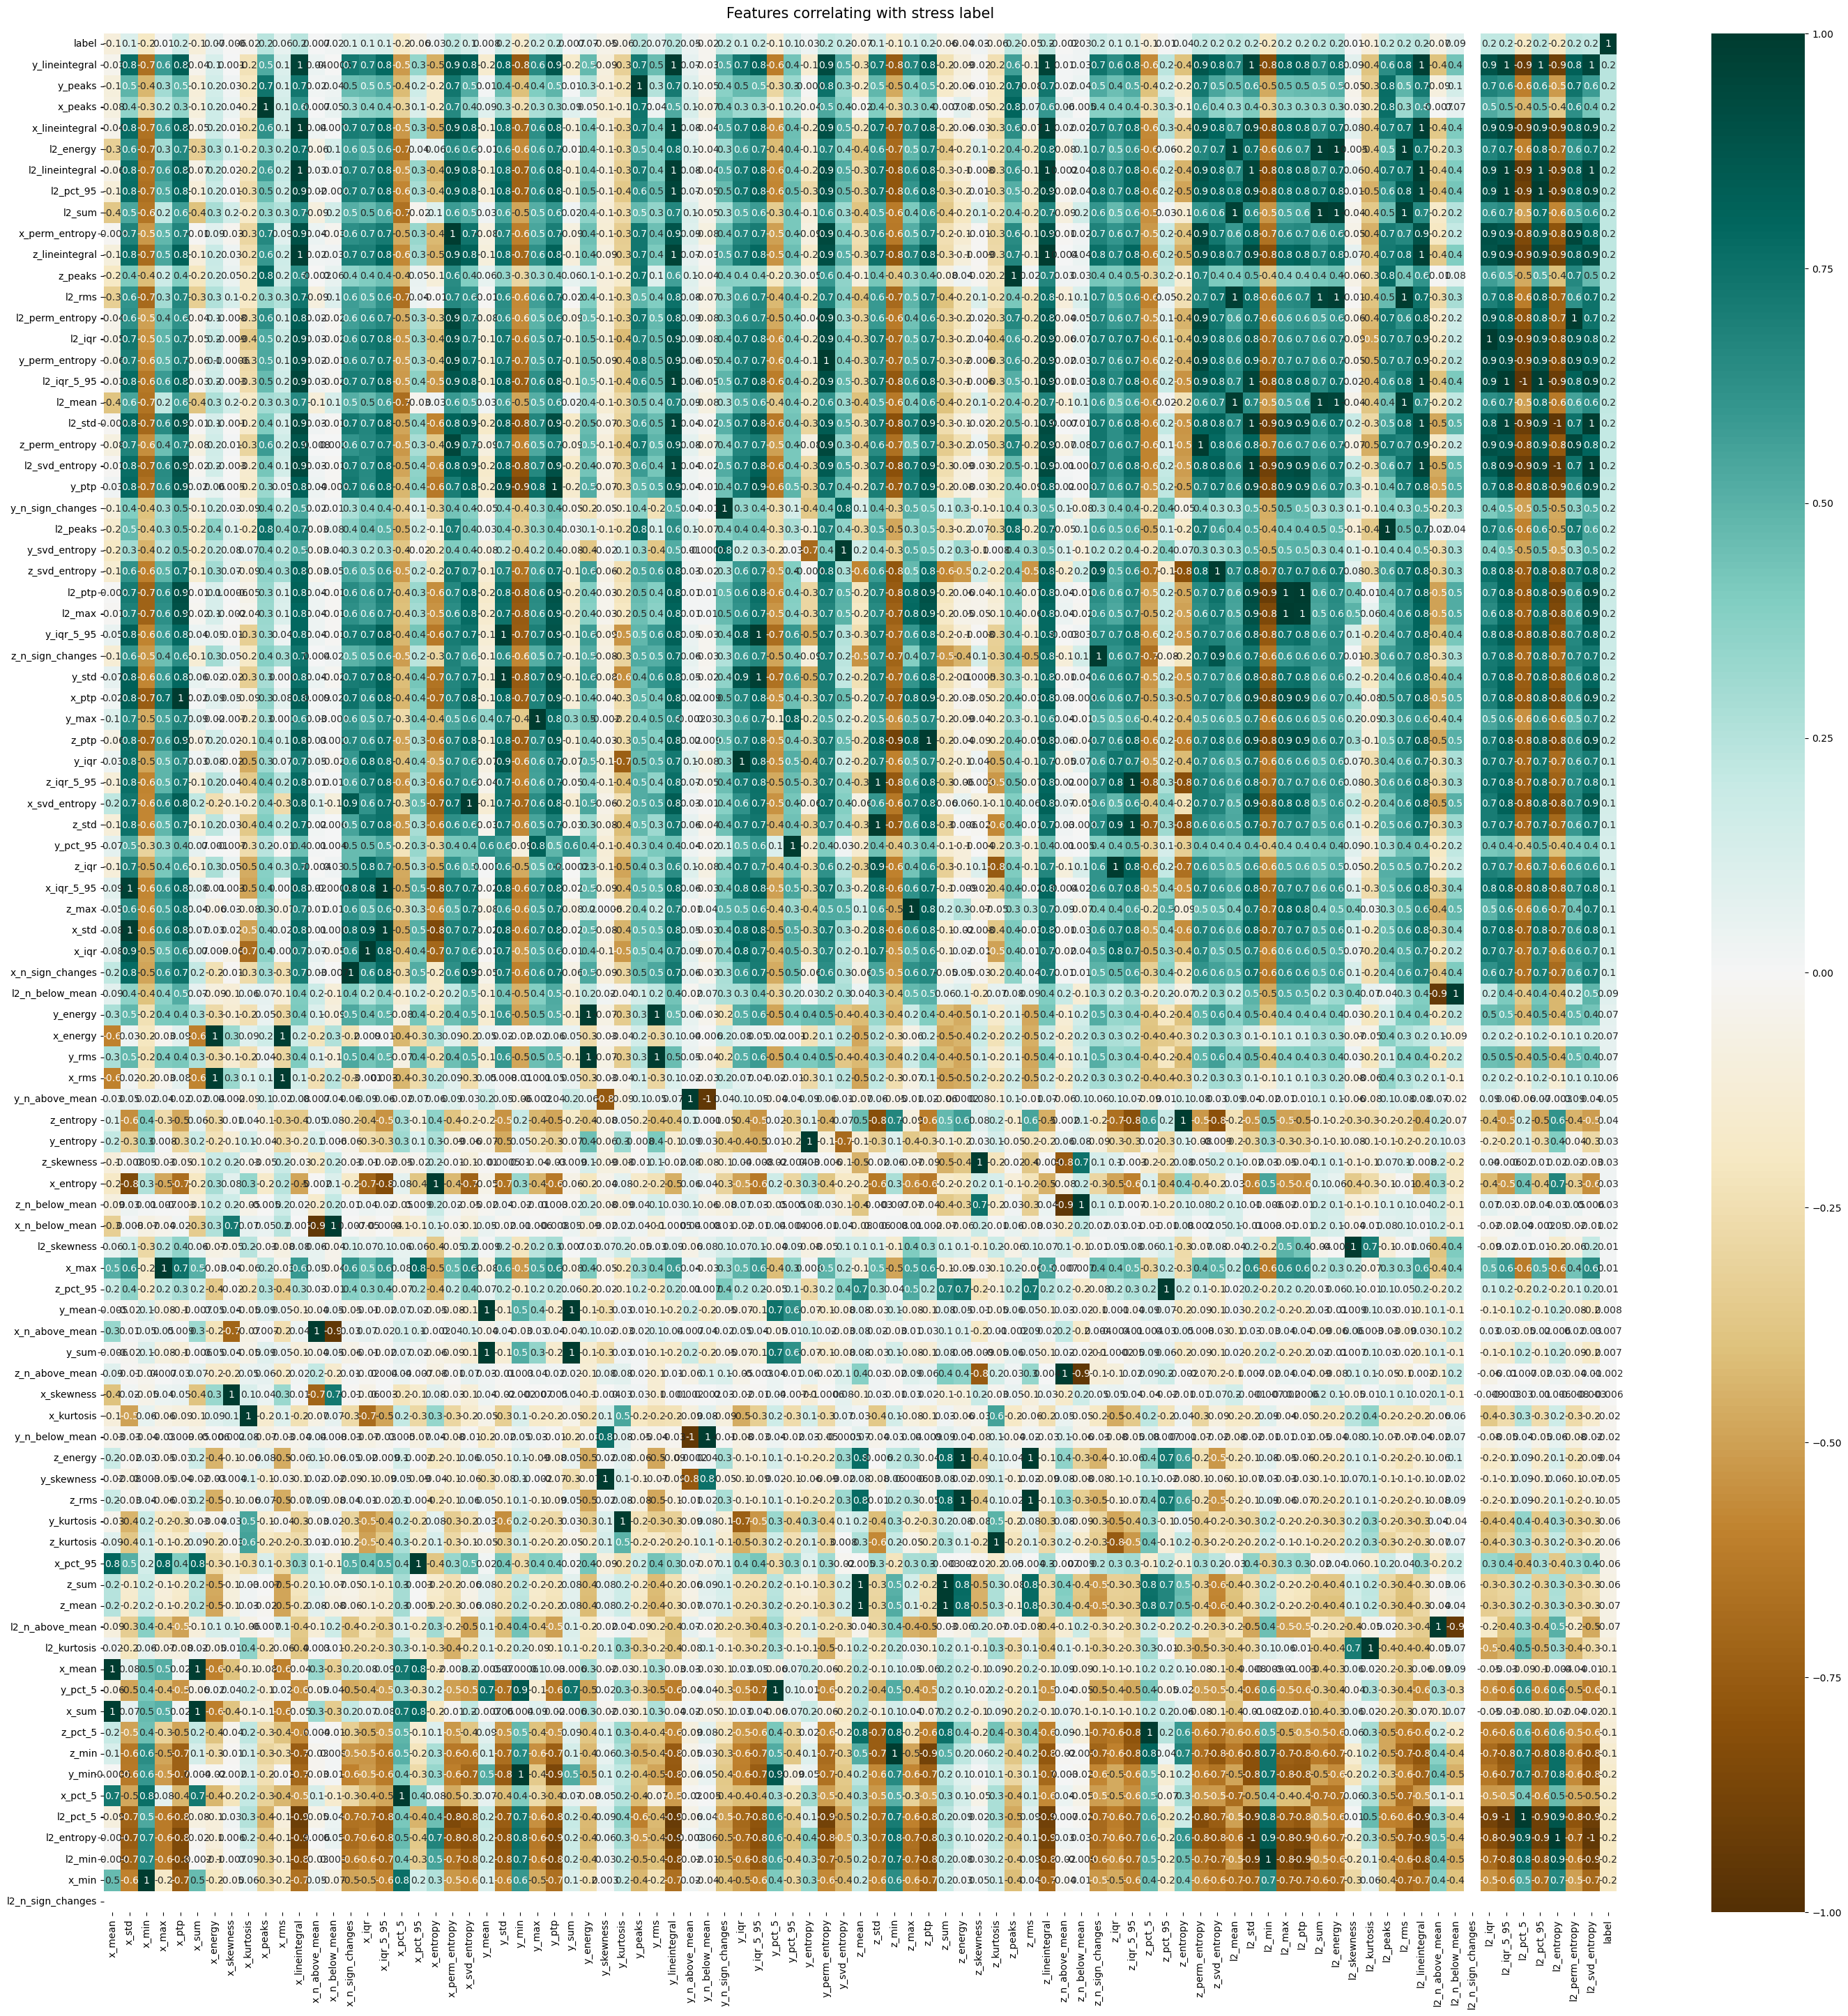

In [58]:
plt.figure(figsize=(35, 35))
corr = df_train.corr(method='spearman')
heatmap = sns.heatmap(corr.sort_values(by='label', ascending=False),
                      vmin=-1, vmax=1, annot=True, fmt='.1g', cmap='BrBG')
heatmap.set_title('Features correlating with stress label', fontdict={'fontsize':15}, pad=16);

# 5. Documenting data lineage

The data we have is from two sources:
* WESAD
* Nurse Study

We combine these two datasets into one. They contain the same information (x, y, z values from the same wrist sensor) and the same labels (stress/no stress). The accelerometer data is recorded with 32 Hz.

Script ```01-extract-data-from-WESAD``` downloads the WESAD dataset, and extracts the accelerometer data from the Empatica E4 wrist sensor, and adds the ground-truth label stress/no stress. The resulting file is stores as a parquet file.

Script ```01-extract-data-from-nurse-dataset``` downloads the nurse study dataset. It unzips all included files. From the raw data from the Empatica E4 wrist sensor, we use the devicely library (https://hpi-dhc.github.io/devicely/) for extracing the accelerometer data and setting it in the correct timezone given in the publication about the data (https://www.nature.com/articles/s41597-022-01361-y). We look up the ground-truth labels and use the stress/no stress labels to label the accelerometer data. The results are stored as a parquet file.

In script ```02-calculate-features```, we concatenate both datasets and calculate features with the FLIRT library (https://flirt.readthedocs.io/en/latest/). In this notebook you're currently reading, we perform EDA. In the following steps, we might want to go back to feature calculation and calculate other/more features. The raw dataset consisting of the raw 32 Hz x, y, and z values though, is fixed and serves as the input for feature calculation.

# 6. Observations from EDA

### Raw data
* There are no missing values.
* We have 9426279 rows of raw data.
* We have 80% of positive cases (stress) and 20% of negative cases in our data - we have to account for this when building and evaluating the model, e.g., by using appropriate evaluation metrics for imbalanced data.
* We could also calculate feature via tsfresh and/or TSFEL; and we could try different parameters for window_length and window_step_size when using FLIRT.

### Looking into the tables and .describe() of all features
* We do not have categorical variables, only numerical (count and float).
* l2_n_sign_changes is constant (the same for every row) and should be removed.
* For x_entropy, y_entropy, and z_entropy, we cannot calculate mean, standard deviation, etc., because several values are calculated as minus infinity. We should decide later on, how we can best deal with this.
* The ranges of the values are quite far from each other - we should normalize/standardize.

### Correlations
* There are several correlated features. Because of the amount of features, we should apply an automated method for deciding which features to keep.